Patrick Woods - CMSC320 Final Project
_______________________________________

Welcome! Today I'll be touching on the topic of climate change! More specifically, we'll be looking at data involving sea level rise and surface temperature rise. It's important to spend time on these topics, and topics related, as this is a prevelant issue facing our society today. The consequences of climate change could be as devestasting as rendering the planet uninhabitable to us, and worst yet, all complex species. To learn more about the field of climate change, head over to https://climate.nasa.gov/, and for more interesting datasets related to climate change, take a look at https://www.globalchange.gov/browse/datasets. Additionaly, this page will server as an introductory crash course into the data science pipeline. We'll see how to pull our data, clean and prepare our data for analysis, perform exploratory data analysis to make a hypothesis, and use machine learning analysis to draw some conclusions about our hypothesis. I'll discuss several coding practices, provide links to extra resources, and comment non-trivial components to my code. Hope you enjoy!

To start, we need to import all the tools necessary to complete our analysis. I tend to maintain a single cell at the top of my notebooks dedicated solely to handling imports. It makes it easy to add a new one, and groups all them together with their import names to make it easy to reference. Today we will be using pandas (tool for holding data in a functional table | https://pandas.pydata.org/), numpy (library used for array structs and math functions | https://docs.scipy.org/doc/numpy/reference/), matplotlib (tool for plotting data | https://matplotlib.org/), seaborn (another plotting tool, I just use it for graph aesthetics today | https://seaborn.pydata.org/index.html), and sklearn (another math function library, used today for ML | https://scikit-learn.org/stable/).

In [25]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import svm

Next, we need to grab our datasets and put them into pandas DataFrames. Pandas has the ability to pull different types of datasets and from different locations, check out this documentation for more information: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html.
_________
For our purposes, we'll be pulling from a website and local files that are both in csv file format. The local files can be downloaded at https://datahub.io/core/global-temp#pandas and https://www.ngdc.noaa.gov/hazard/tsu_db.shtml respectively. Make sure the files reside in the working directory of your notebook.
The link for the web download is https://pkgstore.datahub.io/core/sea-level-rise/csiro_recons_gmsl_mo_2015_csv/data/730bd7382bf3ce1e997becb2fadf40e6/csiro_recons_gmsl_mo_2015_csv.csv.
The first line will grab our sea level data and place it into a dataframe, while the second and third lines will grab the surface temperature data and a tsunami dataset respectively. I've printed out sections of all of the datasets below.

In [24]:
#data grabs
sl_data = pd.read_csv('https://pkgstore.datahub.io/core/sea-level-rise/csiro_recons_gmsl_mo_2015_csv/data/730bd7382bf3ce1e997becb2fadf40e6/csiro_recons_gmsl_mo_2015_csv.csv')
temp_data = pd.read_csv('monthly_csv.csv')
tsu_data = pd.read_csv('tsrunup.txt', delimiter= '\t', encoding='latin-1')

In [4]:
#section to print data sets
print(sl_data)
print('-------------------------------------------------')
print(temp_data)
print('------------------------------------------------------------------------------------')
print(tsu_data)

            Time   GMSL  GMSL uncertainty
0     1880-01-15 -183.0              24.2
1     1880-02-15 -171.1              24.2
2     1880-03-15 -164.3              24.2
3     1880-04-15 -158.2              24.2
4     1880-05-15 -158.7              24.2
5     1880-06-15 -159.6              24.2
6     1880-07-15 -159.6              24.2
7     1880-08-15 -161.8              24.2
8     1880-09-15 -158.9              24.2
9     1880-10-15 -150.3              24.2
10    1880-11-15 -144.5              24.2
11    1880-12-15 -134.7              24.2
12    1881-01-15 -136.4              24.2
13    1881-02-15 -139.2              24.2
14    1881-03-15 -145.2              24.2
15    1881-04-15 -151.1              24.2
16    1881-05-15 -152.2              24.2
17    1881-06-15 -154.2              24.2
18    1881-07-15 -147.7              24.2
19    1881-08-15 -151.4              24.2
20    1881-09-15 -156.0              24.2
21    1881-10-15 -165.5              24.2
22    1881-11-15 -167.9           

Great, we have our data! Now, we need to make sure the data is properly formatted for analysis. This process usually involves checking for improper column/row names, missing data, data in the wrong columns, etc. Looking our datasets, it seems pandas did a pretty solid job of importing our data. The tsunami table is a little ugly and lacking a lot of data, but thats a result of lack of information in the original dataset. At this point, you can perform interpolation techniques to generate the missing values, but since we really aren't going to use this dataset, I won't demonstrate that here today. You can learn more about it at: https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/. For a more robust example of the cleaning process, check out my other project on solar flares that requires heavy cleaning on 2 seperate datasets: https://github.com/pwoods210/Project1/blob/master/Project%201%20Assignment.ipynb 

There's some slight preperation I want to do with the surface temperature dataset before I begin analysis. There are two seperate sources (GCAG and GISTEMP) for reporting the temperature for each date. To make calculations easier, I'm only going to use one of the sources (GCAG), so I drop the GISTEMP reportings from the table. For a more involved preperation process, I use the tsunami dataset as an example. Perhaps you want to see if the frequency of tsunamis has changed with time. The dataset maintains multiple instances of each tsunami for each location that it impacted. You don't want to overcount each tsunami just because it hit more than location, it should be treated as a single tsunami. Below I demonstrate how to do that.

In [26]:
#drop extra temp data
temp_data_GCAG = temp_data.drop(range(1, 3288, 2))

#data prep for tsunami frequency
ID_list = tsu_data.TSEVENT_ID.unique()
freq_data = list()

for index, row in tsu_data.iterrows():
    if (row.TSEVENT_ID in ID_list):
        freq_data.append(row.YEAR)
        ID_list = ID_list[ID_list != row.TSEVENT_ID]

#freq_data now holds all of the unique tsunami instances as a list

Now, lets perform some exploratory data analysis to begin making assumptions about our data. We'll start with a simple plot to see the change in global mean sea level from 1880-2013. The plotting will become more involved as we progress, so here's a link to read up on it: https://matplotlib.org/users/pyplot_tutorial.html

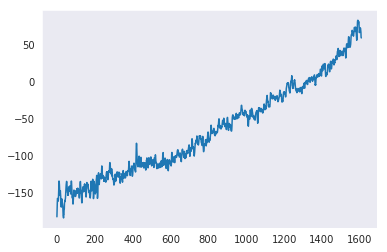

In [27]:
#Exploratory Analysis
sns.set_style('dark')
plt.plot(sl_data.GMSL)

Well, we can see a clear trend in the data, but the graph is largely vague and hard to see speicifc information. We're going to add axis labels, a title, adjust the y axis so that it starts at 0 so we can see the change from the lowest point of the graph, and fix the years along the x axis. 

Text(0, 0.5, 'mm')

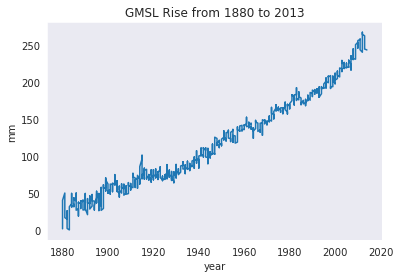

In [28]:
#fix x-axis: generate new list of years that equals the length of the amount of y data. Since there are 12 months in a year,
#I create 12 copies of each year, and since the data is plotted linearly by time, each month of the y value will be assinged to
#the appropiate year sub-section.
x_axis = [1880] * 1608
year = 0
for i in range(len(x_axis)):
    if ((i+1) % 12 == 0):
        year = year + 1
    
    x_axis[i] = x_axis[i] + year

#Here we find the lowest data point in the y values, and then add it to each value to correct the graph to start from 0.
min = abs(sl_data.GMSL.min())
y = sl_data.GMSL.apply(lambda x: x + min)
plt.plot(x_axis, y) #plot our data
#add graph title and axis labels
plt.title('GMSL Rise from 1880 to 2013')
plt.xlabel('year')
plt.ylabel('mm')

Much better. We can now see that sea level has roughly rised 250 mm from 1880-2013. Lets repeat the same techniques to plot the graph for surface temperature.

Text(0, 0.5, 'celsius')

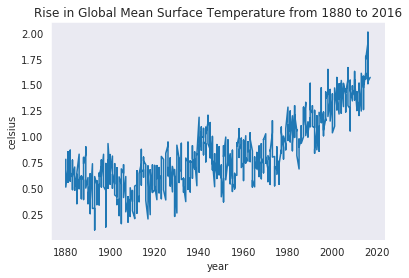

In [29]:
x_axis_temp = [1880] * 1644
year = 0
for i in range(len(x_axis_temp)):
    if ((i+1) % 12 == 0):
        year = year + 1
    
    x_axis_temp[i] = x_axis_temp[i] + year

min = abs(temp_data.Mean.min())
#the brackets here at the end below reverse the list, datset is backwards
y_temp = temp_data_GCAG.Mean.apply(lambda x: x + min).tolist()[::-1] 
plt.plot(x_axis_temp, y_temp)
plt.title('Rise in Global Mean Surface Temperature from 1880 to 2016')
plt.xlabel('year')
plt.ylabel('celsius')

Wonderful. We see that temperature has risen about 1.5 degrees celsius since 1880. Both of these statistics are alarming as even slight fluctuations in global surface temperature can lead to drastic differences in climate, and higher sea levels increases the risks for flooding in coastal areas. To get a more specific look at the rate of change of these 2 graphs, we're going to preform linear regression on the datasets and plot the results over top. I'll use the sktlearn library for this, and more information can be found at: https://realpython.com/linear-regression-in-python/

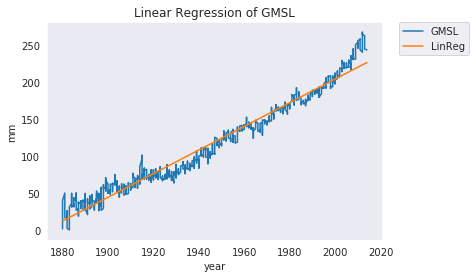

In [34]:
x_reg = np.asarray(x_axis).reshape((-1,1)) 
sl_model = LinearRegression().fit(x_reg, y)
plt.plot(x_axis, y)
plt.plot(x_axis, sl_model.predict(x_reg), label='LinReg')
plt.title('Linear Regression of GMSL')
plt.xlabel('year')
plt.ylabel('mm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Wow, that trend is pretty accurate. It definitely seems that surface level has been rising linearly throughout this time period. The only anomaly is at the tail end of the graph. We see that the regression is under predicting values for 2000-2013. We'll investigate that more here soon.

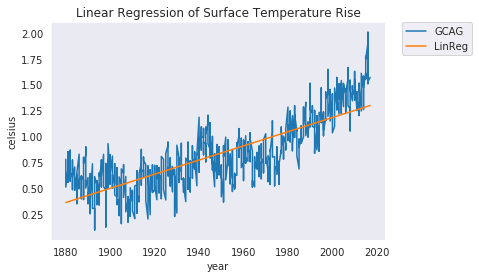

In [35]:
x_temp_reg = np.asarray(x_axis_temp).reshape((-1,1)) 
temp_model = LinearRegression().fit(x_temp_reg, y_temp)
plt.plot(x_axis_temp, y_temp, label='GCAG')
plt.plot(x_axis_temp, temp_model.predict(x_temp_reg), label='LinReg')
plt.title('Linear Regression of Surface Temperature Rise')
plt.xlabel('year')
plt.ylabel('celsius')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Again, a pretty accurate model displaying a linear trend on the graph. The slope is less extreme than the sea level,
but still maintains that anomaly at the end of the graph. Lets the check the residuals of these two graphs and confirm where the model is mispredicting the most. The residuals are calculated by computing the actual data point - the predicted data point for each data point.

Text(0, 0.5, 'residual')

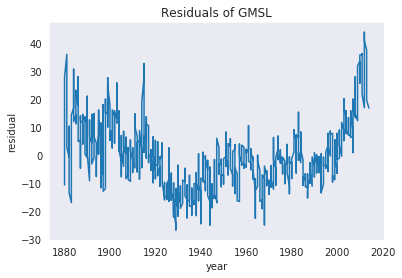

In [36]:
#residuals
sl_resid = list()
p_values = sl_model.predict(x_reg).tolist()

for real, predict in zip(y, p_values):
    sl_resid.append(real-predict)
    
plt.plot(x_axis, sl_resid)
plt.title('Residuals of GMSL')
plt.xlabel('year')
plt.ylabel('residual')

Text(0, 0.5, 'residual')

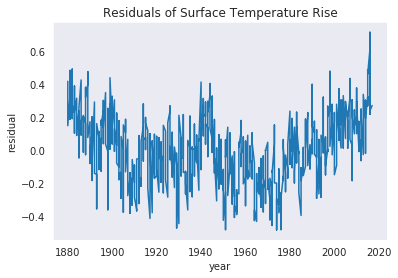

In [37]:
temp_resid = list()
p_values_temp = temp_model.predict(x_temp_reg).tolist()

for real, predict in zip(y_temp, p_values_temp):
    temp_resid.append(real-predict)
    
plt.plot(x_axis_temp, temp_resid)
plt.title('Residuals of Surface Temperature Rise')
plt.xlabel('year')
plt.ylabel('residual')

It seems at the start of the datasets and at the end of the datasets is where the residuals are the highest. There are several factors that could be causing this. First, perhaps the data isn't following a linear trend after all. Instead, it could be following a polynomial or log trend instead. Second, for the earliest years, its possible that data recording methods were not as effective at the time leading to wider varying results. Lastly, perhaps the data was following a linear trend, but now its progessing into a polynomial trend. What does that mean? Well, practicaly, it would mean that the rate of sea level rise and temperature rise is increasing. Bad news. Let's use a machine learning algorithm to make predictions on future sea levels based on the data we currently have (up to 2013). I use the SVR classification within the sklearn library to perfrom my analysis, to learn more about it and machine learning in general, check out these resources: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html | https://www.youtube.com/watch?v=BpPJxtOk8uw

In [38]:
ml = sl_data
ml = ml.assign(Time = x_axis)
ml = ml.assign(GMSL = y)
#not shuffling the data can give the algorithm extra information about the dataset.
#we don't want it to 'cheat' at developing its model.
ml = sklearn.utils.shuffle(ml) 
print(ml)

      Time   GMSL  GMSL uncertainty
1452  2001  208.3               6.7
705   1938   93.8              11.7
668   1935   86.1              11.8
360   1910   57.2              15.1
802   1946  103.5              10.4
1028  1965  147.9               6.6
1035  1966  137.0               6.5
1289  1987  175.2               6.3
395   1913   70.1              14.3
397   1913   61.3              14.0
419   1915   95.9              13.7
1325  1990  184.5               6.5
955   1959  138.9               6.5
306   1905   52.5              15.4
1527  2007  222.8               7.1
152   1892   32.8              20.7
304   1905   48.5              15.4
96    1888   29.2              20.8
1343  1992  187.4               6.6
716   1939   97.6              12.1
824   1948  116.2               9.2
115   1889   36.9              20.7
1042  1966  133.0               6.6
166   1893   39.4              20.2
291   1904   61.2              17.1
1414  1997  206.5               6.7
56    1884   34.1           

You want to split your data into train data and test data. What this means is that you'll feed a bulk of your data into the algorithm for it to develop its model, and then you want to test the model against data it hasn't seen before so you can check its ability to accuratly predict values. 

In [39]:
X = ml.drop("GMSL", axis = 1).values
y_ml = ml['GMSL'].values

test_size = 25

x_train = X[:-test_size]
y_train = y_ml[:-test_size]

x_test = X[-test_size:]
y_test = y_ml[-test_size:]

clf = svm.SVR(kernel="linear")
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
clf.score(x_test, y_test)

0.9408580365990333

The score is a rough measure on how accurate your model is at predicting data. It ranges from 0 to 1 and generally speaking a score about .8 is considered strong. So, with a score of .94, we're looking good. Let's check how close it was to predicting the values of our test data.

In [19]:
for x,Y in zip(x_test, y_test):
    print(f"Model: {clf.predict([x])[0]}, Actual: {Y}")

Model: 67.3691130888028, Actual: 69.4
Model: 108.64431346788388, Actual: 112.5
Model: 50.29620094432812, Actual: 28.19999999999999
Model: 139.99092316183578, Actual: 148.7
Model: 90.40404432754349, Actual: 75.4
Model: 169.85894652477782, Actual: 171.4
Model: 69.16547510142755, Actual: 73.2
Model: 59.167722560217044, Actual: 61.599999999999994
Model: 62.96793329038974, Actual: 70.0
Model: 43.463109055751374, Actual: 29.19999999999999
Model: 56.21054878293853, Actual: 55.599999999999994
Model: 122.76659660854693, Actual: 140.6
Model: 86.74215809091311, Actual: 75.4
Model: 166.61857825353127, Actual: 171.4
Model: 118.08222291640323, Actual: 134.9
Model: 66.91301349944752, Actual: 67.5
Model: 128.15568265387174, Actual: 143.8
Model: 185.63926705041285, Actual: 192.2
Model: 56.21054878293853, Actual: 54.30000000000001
Model: 172.0076642914055, Actual: 174.6
Model: 90.40404432754349, Actual: 75.5
Model: 97.62407336778324, Actual: 89.8
Model: 103.43467797546964, Actual: 103.2
Model: 220.05333

Not too bad, as some predictions are close and others aren't so much. But overall it did a pretty good job at getting in the ballpark. Now lets generate some future test data for the model predict. This involves making a list of years, which I will do for 2014-2023, and then a list of uncertanties to go with each year. Looking at the original dataset of sea level, it seems a slow increment from 9 will be sufficient. 

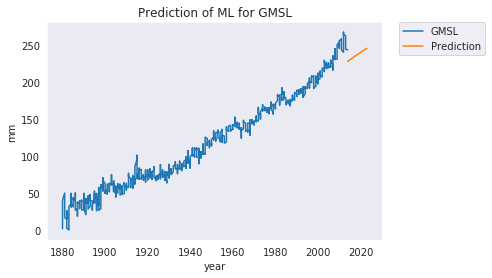

In [41]:
pred_list = list()
predict = [[2014., 9.0],
           [2015., 9.2],
           [2016., 9.2],
           [2017., 9.3],
           [2018., 9.4],
           [2019., 9.4],
           [2020., 9.4],
           [2021., 9.5],
           [2022., 9.5],
           [2023., 9.5]]
for data in predict:
    pred_list.append(clf.predict([data])[0])
    
plt.plot(x_axis, y)
plt.plot([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], pred_list, label='Prediction')
plt.title('Prediction of ML for GMSL')
plt.xlabel('year')
plt.ylabel('mm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Very intersting. It seems our machine learning model is going to underpredict the future values based on the current data. To get a better idea of what the model should be outputing, lets head over to https://climate.nasa.gov/vital-signs/sea-level/ to check the current sea levels for 2019. Based on the site, it seems that sea level has risen about 93 mm since 93. Using our sea level dataset we can compute where it should be on our graph.

Text(0, 0.5, 'mm')

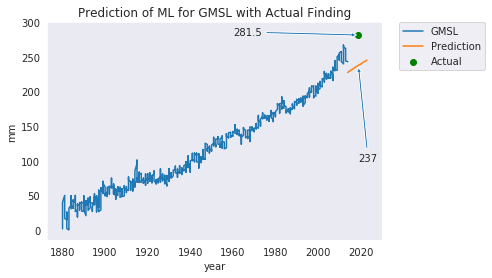

In [42]:
#code to check against regression model
point = 0
for year, datapoint in zip(x_axis, y):
    if year == 1993:
        point = datapoint
        break
        
plt.plot(x_axis, y)
plt.plot([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], pred_list, label='Prediction')
plt.scatter([2019], [point+93], c='g', label='Actual')
plt.annotate(s=281.5, xy=(2019,(point+93)), arrowprops={'arrowstyle': 'simple'}, xytext=(1960,281.5))
plt.annotate(s=int(pred_list[5]), xy=(2019,pred_list[5]), arrowprops={'arrowstyle': 'simple'}, xytext=(2019,100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Prediction of ML for GMSL with Actual Finding')
plt.xlabel('year')
plt.ylabel('mm')

Yikes! Our model is nearly 50 mm off from the actual, while only 20 mm off from 2014. This seems to confirm that rate of sea level rise is accelerating, and is becoming more of a quadratic trend. This is news for heavy concern, as the consequences of climate change are becoming more compounded. Coastal homes will become inhabitable, floods will become more common and more devasting. While its hard to derive causation from graphs alone, it definitely seems surface temperature and sea level are at least correlated, probably due to the melting of polar caps. As a basis for next steps, this is where the tsunami dataset comes into play. I'm predicting that the impact of tsunamis will become more devasting as the water surge heights are being compounded by the higher sea levels. Performing analysis and developing models on the destruction categories of the tsunami data linked above would be a great place to start to test this hypothesis. Alternatively, exploring some of the other datasets available at https://www.globalchange.gov/browse/datasets and comparing derivations to this one could be a progressing step as well. I hope you enjoyed this quick crash course and were able to learn something new about climate change and performing data science techniques with python!